In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as mpl

In [2]:
import matplotlib
%matplotlib inline

In [5]:
# Let's create a function to model and create data
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [6]:
np.exp((1,2,3))

array([  2.71828183,   7.3890561 ,  20.08553692])

In [7]:
#Generate
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)


In [8]:
#Adding noise to the data 
yn = y +0.2 *np.random.normal(size=len(x))

In [9]:
print yn

[ 0.17630625  0.03407187  0.15239387  0.0770257   0.21347697 -0.1959887
 -0.00350237  0.05200752 -0.11542234 -0.21436732  0.17232568  0.1459925
  0.55677118  0.59995434  0.12087834  0.09227296 -0.13114644  0.45040858
  0.13366291  0.43097348  0.54106046  0.05804656  0.28524077  0.4176069
  0.68879567  0.69920731  0.49051737  0.61662384  0.29916187  0.64591324
  1.0361518   0.944541    0.65407007  0.68564761  0.95450777  0.84476231
  0.85438933  1.14484139  0.68591528  0.74578247  0.85424286  0.90643386
  0.57753628  1.07965285  0.83356076  1.10382476  1.02828783  1.12453862
  0.9705772   1.17465232  1.2423021   0.73466937  1.02867174  0.92040837
  0.82019006  0.94047041  1.24280542  0.82033583  0.67299326  1.1289252
  1.15823788  0.79262837  0.62928821  0.8358814   0.49815184  0.65891001
  0.74203938  0.7447582   0.58567623  0.68266734  0.53840705  0.36269145
  0.64287329  0.7623642   0.24152796  0.46959697  0.51700351  0.75368799
  0.03086826  0.22980602 -0.12469565  0.35765193  0.353

In [11]:
np.random.normal(size=(5,5))

array([[ 0.12866547,  0.01332187, -0.04164999, -0.84432077, -1.04750031],
       [ 0.44995226,  0.18821536,  0.70213418, -0.61399425, -2.09214404],
       [ 0.5428983 , -0.36616267, -0.41543685,  1.93332919, -0.6942192 ],
       [-1.16031461, -0.51134017, -0.34468219,  1.01806214,  0.88829969],
       [-0.91732456,  0.78624573, -0.8109488 ,  1.81951525, -0.47873669]])

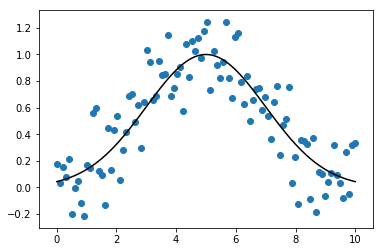

In [12]:
# Plot out the current state of the data and model
fig = mpl.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, yn)
fig.savefig('model_and_noise_multiple.png')

In [13]:
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

In [14]:
print popt
print pcov

[ 1.02275792  4.88796632 -1.97610912]
[[  1.64152761e-03   5.24047458e-06   2.15481835e-03]
 [  5.24047458e-06   8.14617275e-03   2.42689631e-05]
 [  2.15481835e-03   2.42689631e-05   8.36304485e-03]]


In [16]:
ymodel = func(x, popt[0], popt[1], popt[2])
#this is the same as
#ymodel = func(x, popt)

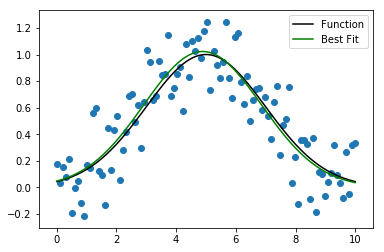

In [18]:
#popt returns the best fit values for parameters of the given model (func)
# Plot out the current state of the data and model
fig = mpl.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.plot(x,ymodel,c='g',label='Best Fit')
ax.scatter(x, yn)
fig.savefig('model_and_noise_multiple.png')
ax.legend()